# Python Basics

In diesem Notebook werden einige Standard-Befehle und -Packages der Programmiersprache python vorgestellt, die für die Projektarbeit relevant sein werden.

## Pandas

Nützlich zum Einlesen von Daten, beispielsweise aus Tabellen. Erzeugt einen Pandas-DataFrame.

In [2]:
#import pandas 
import pandas as pd

Wir laden den Datensatz "student_data", der den Erfolg von Studierenden anhand verschiedener Einflussfaktoren beschreibt. Es gibt verschiedene Befehle, um sich einen ersten Eindruck von den Daten zu verschaffen.

In [3]:
# load data
data = pd.read_csv('student_data.csv', sep=';')

data.head()        # first lines 
#data.info()        # summary
#data.Target        # shows column with header 'Target'
#data['Target']     # shows column with header 'Target'

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Pandas-DataFrames haben zahlreiche Attribute und Methoden, mit deren Hilfe wir einen Datensatz erkunden können. Eine gute Übersicht findet man in der Dokumentation auf der pandas-website.

Attributes

In [58]:
# show 4th entry of the 3rd row
print('4th entry of the 3rd row is', data.iloc[2, 3])

# show size/shape of the DataFrame
print('The dimension of the DataFrame is', data.size)
print('The shape is', data.shape)

# show the names of the first 4 columns
print(data.columns[range(4)])

4th entry of the 3rd row is 9070
The dimension of the DataFrame is 163688
The shape is (4424, 37)
Index(['Marital status', 'Application mode', 'Application order', 'Course'], dtype='object')


Methods

In [59]:
# correlation of features
pairwise_correlation = data[['Application order', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].corr()


,Application order,Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
Application order,1.000000,-0.096930,0.058308,0.055517
Admission grade,-0.096930,1.000000,0.073868,0.074402
Curricular units 1st sem (grade),0.058308,0.073868,1.000000,0.837170
Curricular units 2nd sem (grade),0.055517,0.074402,0.837170,1.000000


In [66]:
# quantiles of the 1st sem grades
data['Curricular units 1st sem (grade)'].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

0.01     0.000000
0.05     0.000000
0.25    11.000000
0.50    12.285714
0.75    13.400000
0.95    14.857143
0.99    16.000000
Name: Curricular units 1st sem (grade), dtype: float64

In [69]:
# replace zeros by something
data.replace(0, 'something').head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,something,something,something,something,something,something,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,something,6,6,6,13.666667,something,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,something,6,something,something,something,something,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,something,6,10,5,12.4,something,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,something,1,100.0,1,37,38,...,something,6,6,6,13.0,something,13.9,-0.3,0.79,Graduate


## Numpy

Für Berechnungen aller Art ist es praktisch, die Daten von einem Pandas DataFrame in einen numpy-array umzuwandeln.

In [5]:
# import numpy
import numpy as np

# convert pandas DataFrame into numpy-array
data_num = data.to_numpy()

type(data_num)
#type(data)

numpy.ndarray

Wir können nun einfache Berechnungen im Datensatz mit Hilfe vorimplementierter numpy-Befehle durchführen:

In [6]:
# number of dropouts, failure rate
dropout_number = np.sum(data_num[:, 36] == 'Dropout')
dropout_rate = np.mean(data_num[:, 36] == 'Dropout')

# min, max age at enrollment
min_age, max_age = np.min(data['Age at enrollment']), np.max(data['Age at enrollment'])

print(dropout_number, dropout_rate, min_age, max_age)

1421 0.3212025316455696 17 70


## Matplotlib

Daten-Visualisierung durch einfache Plots 

In [7]:
# import matplotlib
import matplotlib.pyplot as plt

Die Spalte 'Marital Status' unterteilt die Studierenden in 6 Gruppen:

1 – single 
2 – married 
3 – widower 
4 – divorced 
5 – facto union 
6 – legally separated

Dies kann man sich beispielsweise in einem Kuchendiagramm veranschaulichen:

([<matplotlib.patches.Wedge at 0x25d0560f490>,
 [Text(-1.0300229274297137, 0.3860735279310445, 'single'),
  Text(0.9914043784822426, -0.4765683144379602, 'married'),
  Text(1.0829857307758033, -0.19272235712547608, 'widower'),
  Text(1.0935138259008728, -0.11927913716839016, 'divorced'),
  Text(1.0996203232671296, -0.02889886949162434, 'facto_union'),
  Text(1.099990014848897, -0.004686921454785126, 'legally separated')])

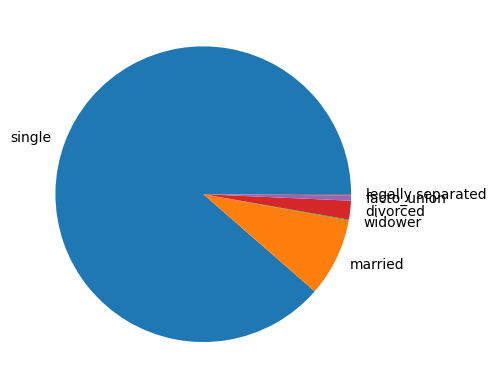

In [8]:
# calculate the total number of students with a specified marriage status
mar_status = [np.sum(data_num[:, 0] == i+1) for i in range(6)]

# show pie diagram
plt.pie(mar_status, labels=['single', 'married', 'widower', 'divorced', 'facto_union', 'legally separated'])

Die Spalte 'Age at enrollment' enthält das Alter der Studierenden bei der Einschreibung. Die Verteilung könenn wir uns in einem Barplot veranschaulichen.

<BarContainer object of 54 artists>

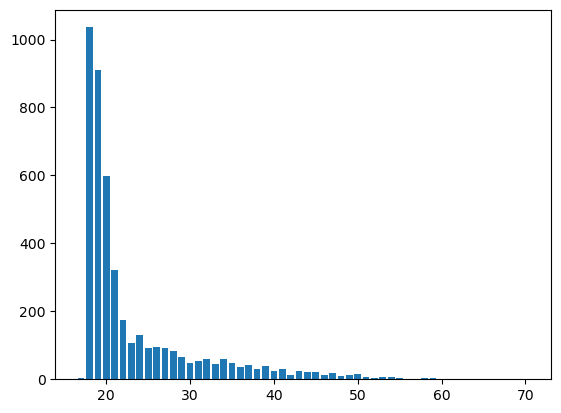

In [9]:
# for each age, count the number of students
age = [np.sum(data['Age at enrollment'] == i) for i in range(min_age, max_age+1)]

# plot bar diagram
plt.bar(range(min_age, max_age+1), age)

## Seaborn

Seaborn ist eine API basierend auf matplotlib. Erzeugt komplexere und schönere Plots als matplotlib ohne viel code.

In [10]:
# import seaborn
import seaborn as sns

Wir können Anhängigkeiten verschiedener features durch einen pairwise relationship plot veranschaulichen:  

d:\anaconda3\envs\python_ws23\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


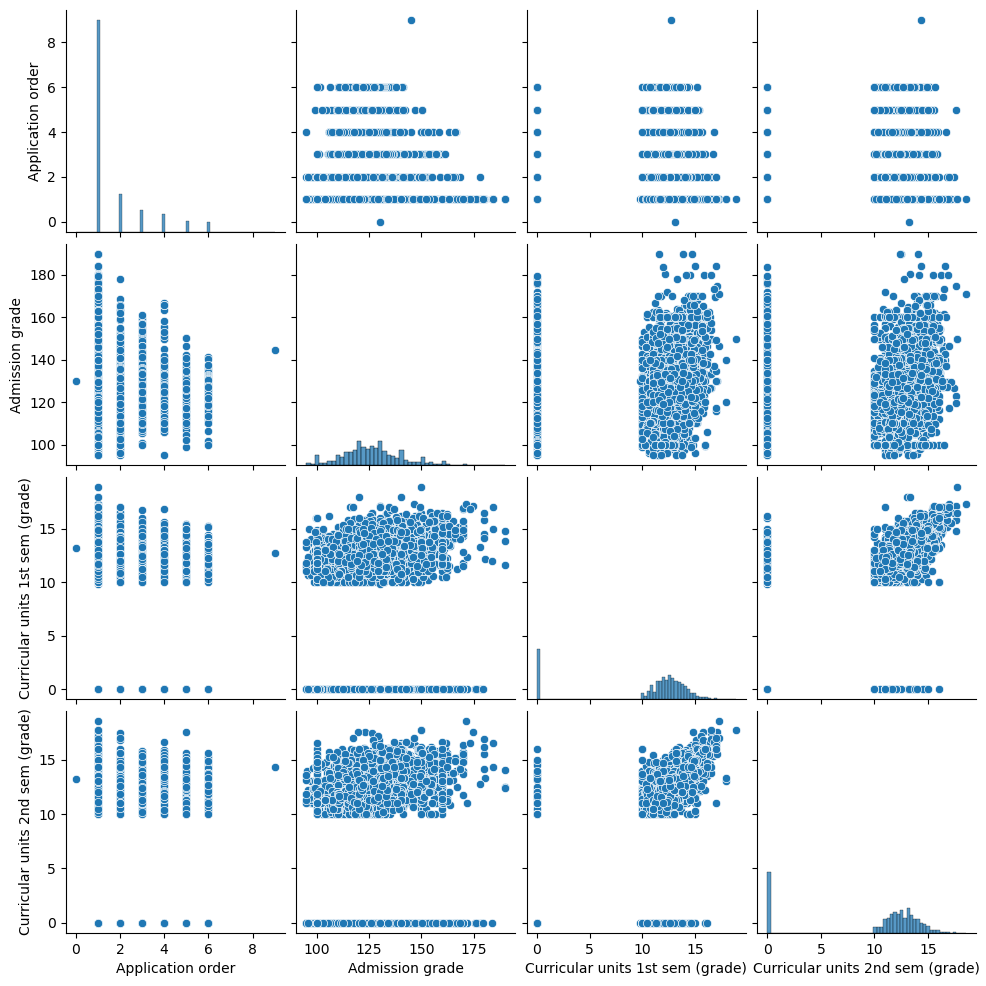

In [11]:
sns.pairplot(data[['Application order', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]);

Wir löschen die Studierenden ohne Note aus den Daten:

In [12]:
not_graded = np.logical_or((data['Curricular units 1st sem (grade)'] == 0), (data['Curricular units 2nd sem (grade)'] == 0))
indices = np.where(not_graded)[0]
data_grades = data.drop(labels=indices)

Den Zusammenhang zwischen den Noten im ersten und zweiten Semester schauen wir und genauer an: 

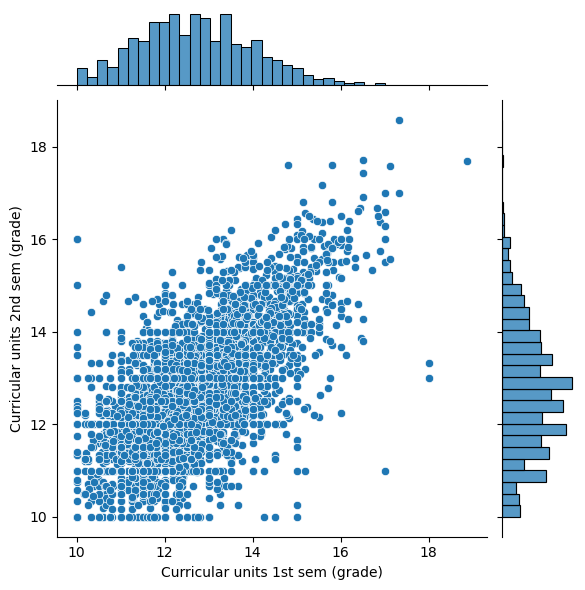

In [13]:
sns.jointplot(x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', data=data_grades)

Boxplots sind ein nützliches Werkzeug um einen detaillierten Eindruck von Daten zu bekommen. Im folgenden betrachten wir die Noten im ersten Semester, wobei wir die Studierenden nach ihrer 'Application order' unterscheiden (0 - first choice, 9 - last choice)

<Axes: xlabel='Application order', ylabel='Curricular units 1st sem (grade)'>

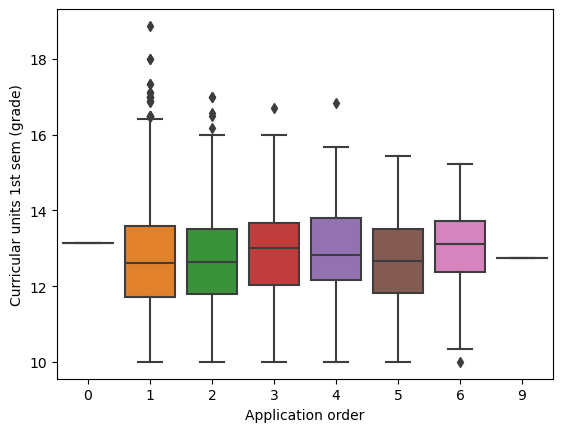

In [14]:
sns.boxplot(y='Curricular units 1st sem (grade)', x='Application order', data=data_grades)

## Plotly

Erzeugt interaktive Plots. Zum Beispiel können wir den Boxplot aus dem vorherigen Abschnitt auch interaktiv betrachten

In [15]:
# import plotly
import plotly.express as px

# create interactive boxplot
px.box(data_frame=data_grades, x='Application order', y='Curricular units 1st sem (grade)')